# Alalisvool
Fred Järv

### Andmekoguri kalibreerimine
Töö esimese ülesandena kalibreeriti Vernieri andmekoguri pingesensor kahel võrdluspunktile: null-pinge (0 V) ja kasutatav ülemine pinge (10 V). Kalibreerimise mõte on eemaldada mõõteriista nihked ja skaalavead, et hilisemad mõõtmised oleksid usaldusväärsed. Nullpunkti seadistamine tagab, et andur näitab 0 V siis, kui tegelik pinge on 0 V. Ilma kalibreerimiseta võiksid hiljem arvutatavad takistused ja järeldused Ohmi seaduse kohta olla süsteemse vea tõttu nihkes.

### Takistuse määramine graafilisel meetodil 
Teises katses määrati takisti R4 takistus Vernieri andmekoguri abil, kasutades samaaegselt pingesensorit ja voolusensorit. Enne mõõtmist nulliti sensorite näidud , et vältida algseadistusest tulenevat viga. Mõõtmine tehti 2 korda sekundis ja kestusega 20 sekundit, mille jooksul muudeti pinget sujuvalt 0 V kuni 10 V.Graafilise meetodi mõte on see, et ideaalse ohmilise takisti korral kehtib seos U=R⋅I, ehk pinge ja vool on võrdelised ning U(I) graafik on sirge, mis läbib (ideaalselt) nullpunkti. Takistus R leitakse sirge tõusuna.

Kuna pythoni eriti ei oska, siis lasin Chat-GPT-l koodi kirjutada.

In [99]:
import numpy as np
import matplotlib.pyplot as plt

aeg1 = [
    0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5,
    5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5,
    10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5,
    15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0]

I1 = [
    0.0631, 0.0628, 0.0631, 0.0538, 0.0541, 0.0538, 0.0451, 0.0454, 0.0355, 0.0355,
    0.0358, 0.0358, 0.0267, 0.0180, 0.0180, 0.0180, 0.0087, 0.0090, 0.0177, 0.0177,
    0.0267, 0.0267, 0.0358, 0.0358, 0.0358, 0.0451, 0.0451, 0.0541, 0.0538, 0.0541,
    0.0628, 0.0631, 0.0722, 0.0722, 0.0815, 0.0815, 0.0905, 0.0905, 0.0902, 0.0902, 0.0815]

U1 = [
    -6.965, -6.955, -6.946, -5.956, -5.952, -5.952, -4.972, -4.962, -3.968, -3.963,
    -3.963, -3.973, -2.974, -1.989, -1.985, -1.989, -0.985, -0.990, -1.985, -1.994,
    -2.974, -2.984, -3.968, -3.978, -3.968, -4.972, -4.952, -5.956, -5.947, -5.956,
    -6.946, -6.951, -7.940, -7.940, -8.939, -8.944, -9.928, -9.933, -9.933, -9.928, -8.944]

aeg1 = np.array(aeg1, dtype=float)
I1 = np.array(I1, dtype=float)
U1 = np.array(U1, dtype=float)

I1_abs = np.abs(I1)
U1_abs = np.abs(U1)

Katseandmetest koostame graafiku pinge sõltuvus voolutgevusest ning läbi nullpunkti tõmbame regressioonisirge, mille tõus annabki meile vastvalt Ohmi seadusele takistuse väärtuse.

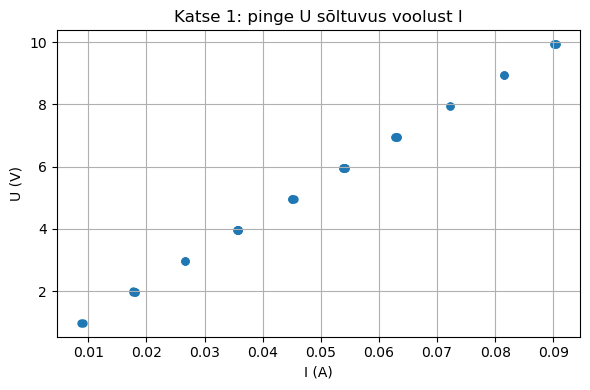

In [100]:
plt.figure(figsize=(6,4))
plt.scatter(I1_abs, U1_abs, s=25)
plt.xlabel("I (A)")
plt.ylabel("U (V)")
plt.title("Katse 1: pinge U sõltuvus voolust I")
plt.grid(True)
plt.tight_layout()
plt.show()

In [101]:
R1_graaf = np.sum(I1_abs * U1_abs) / np.sum(I1_abs**2)
R1_graaf

np.float64(110.16197683018228)

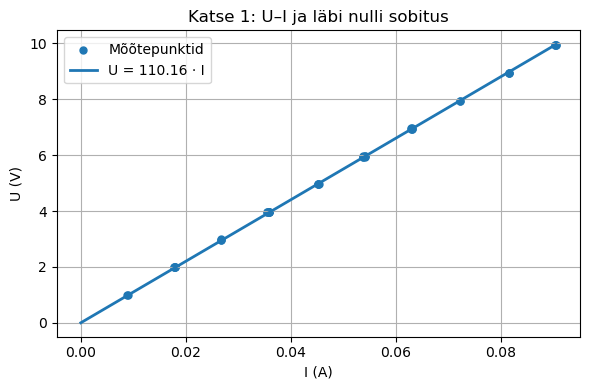

In [102]:
I_fit = np.linspace(0, I1_abs.max(), 200)
U_fit = R1_graaf * I_fit

plt.figure(figsize=(6,4))
plt.scatter(I1_abs, U1_abs, s=25, label="Mõõtepunktid")
plt.plot(I_fit, U_fit, linewidth=2, label=f"U = {R1_graaf:.2f} · I")
plt.xlabel("I (A)")
plt.ylabel("U (V)")
plt.title("Katse 1: U–I ja läbi nulli sobitus")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Ohmi seaduse kehtivust hinnati U(I) graafiku lineaarsuse põhjal. Lineaarne seos viitab, et takisti käitub ohmiliselt antud pingete ja voolude vahemikus ning takistus on ligikaudu konstantne.

#### Leian a tüüpi määramatuse ja laiendmääramatuse usaldusnivooga 95%

In [103]:
n = len(I1_abs)
res = U1_abs - R1_graaf * I1_abs
uR_A = np.sqrt(np.sum(res**2) / ((n-1) * np.sum(I1_abs**2)))

R1_graaf, uR_A
print(f" R = {R1_graaf:.2f}({round(uR_A, 2)})Ω")

 R = 110.16(0.08)Ω


In [104]:
k = 1.96
U_laiend = k * uR_A

print(f"R (katse 1) = {R1_graaf:.2f} Ω")
print(f"u_A(R)      = {uR_A:.3f} Ω")
print(f"U = k*u_A    = ±{U_laiend:.3f} Ω (k={k})")
print(f" R = {R1_graaf:.2f} ± {U_laiend:.3f} Ω")

R (katse 1) = 110.16 Ω
u_A(R)      = 0.080 Ω
U = k*u_A    = ±0.157 Ω (k=1.96)
 R = 110.16 ± 0.157 Ω


Andmed multimeetriga mõõdetud pingest U ja voolust I. Iga mõõtmise jaoks arvutati takistus Ohmi seaduse abil.

In [105]:
U2 = np.array([9.00, 8.75, 8.75, 9.00, 9.00], dtype=float)
uU2 = np.array([0.16, 0.15, 0.15, 0.16, 0.16], dtype=float) #Määramatus

I2 = np.array([0.14, 0.14, 0.14, 0.14, 0.14], dtype=float)
uI2 = np.array([0.002, 0.002, 0.002, 0.002, 0.002], dtype=float) # Määramatus

R2 = U2 / I2
R2

array([64.28571429, 62.5       , 62.5       , 64.28571429, 64.28571429])

In [106]:
R2_mean = np.mean(R2)
n2 = len(R2)

uA_R2 = np.sqrt(np.sum((R2 - R2_mean)**2) / (n2*(n2-1)))

print("R_i =", R2)
print(f"R_keskmine = {R2_mean:.2f} Ω")
print(f"u_A(R_keskmine) = {uA_R2:.3f} Ω (a tüüpi määramatus)")

R_i = [64.28571429 62.5        62.5        64.28571429 64.28571429]
R_keskmine = 63.57 Ω
u_A(R_keskmine) = 0.437 Ω (a tüüpi määramatus)


B-tüüpi standardmääramatu
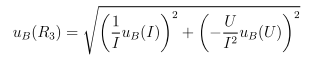

In [107]:
U_bar = np.mean(U2)
I_bar = np.mean(I2)

uU_typ = np.mean(uU2)
uI_typ = np.mean(uI2)

uB_R2 = R2_mean * np.sqrt((uU_typ/U_bar)**2 + (uI_typ/I_bar)**2)

print(f"u_B(R_keskmine) ≈ {uB_R2:.3f} Ω  (päris suur väärtus)")

u_B(R_keskmine) ≈ 1.437 Ω  (päris suur väärtus)


Liitmääramatus 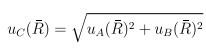

In [108]:
uC_R2 = np.sqrt(uA_R2**2 + uB_R2**2)
U95_R2 = k * uC_R2

print(f"u_C = {uC_R2:.3f} Ω")
print(f"U95 = ±{U95_R2:.3f} Ω (k={k})")
print(f"Lõpptulemus: R ≈ ({R2_mean:.2f} ± {U95_R2:.2f}) Ω")

u_C = 1.503 Ω
U95 = ±2.945 Ω (k=1.96)
Lõpptulemus: R ≈ (63.57 ± 2.95) Ω


In [109]:
f"Seega on arvutatud takistus {R2_mean:.2f} ± {U95_R2:.2f} Ω"

'Seega on arvutatud takistus 63.57 ± 2.95 Ω'

# Skeemi voolutugevuse uurimine

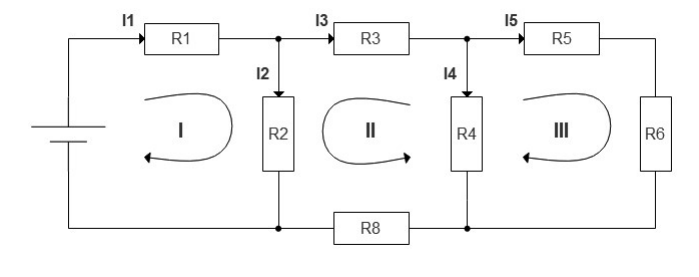

Koostasin selle skeemi aga ilma R8-ta. Multimeetriga mõõtsin ära kõik voolud, pinged, takistused. Skeemis mõõdeti pinge voltmeetriga takisti klemmidelt (paralleelselt takistiga) ning vool ampermeetriga jadas vastava haruga.

In [110]:
takistid = {
    "R1": (36.2, 1.4),
    "R2": (47.0, 1.5),
    "R3": (69.8, 1.6),
    "R4": (109.5, 1.9),
    "R5": (150.5, 2.2),
    "R6": (182.5, 2.4),
    "R7": (202.9, 2.5),
    "R8": (307.4, 3.3),}

takistid

{'R1': (36.2, 1.4),
 'R2': (47.0, 1.5),
 'R3': (69.8, 1.6),
 'R4': (109.5, 1.9),
 'R5': (150.5, 2.2),
 'R6': (182.5, 2.4),
 'R7': (202.9, 2.5),
 'R8': (307.4, 3.3)}

In [111]:
for nimi, (R, uR) in takistid.items():
    print(f"{nimi}: {R:.1f} ± {uR:.1f} Ω (B-tüüp)")

R1: 36.2 ± 1.4 Ω (B-tüüp)
R2: 47.0 ± 1.5 Ω (B-tüüp)
R3: 69.8 ± 1.6 Ω (B-tüüp)
R4: 109.5 ± 1.9 Ω (B-tüüp)
R5: 150.5 ± 2.2 Ω (B-tüüp)
R6: 182.5 ± 2.4 Ω (B-tüüp)
R7: 202.9 ± 2.5 Ω (B-tüüp)
R8: 307.4 ± 3.3 Ω (B-tüüp)


In [112]:
# Mõõdetud pingelangus (V) ja voolud (A)
U_meas = {
    "R1": (4.50, 0.03),
    "R2": (0.36, 0.04),
    "R3": (0.81, 0.01),
    "R4": (0.95, 0.01),
    "R5": (0.43, 0.01),
    "R6": (0.53, 0.01),
    "R7": (3.58, 0.03),}
I_meas = {
    "R1": (0.1200, 0.0009),
    "R2": (0.1123, 0.0008),
    "R3": (0.0117, 0.0002),
    "R4": (0.0086, 0.0002),
    "R5": (0.0029, 0.0002),
    "R6": (0.0029, 0.0002),
    "R7": (0.0029, 0.0002),}

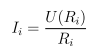

In [113]:
I_calc = {}
uI_calc = {}

for nimi in U_meas:
    U, uU = U_meas[nimi]
    R, uR = takistid[nimi]  # võtame R ja uR takistitabelist
    
    I = U / R
    uI = abs(I) * np.sqrt((uU/U)**2 + (uR/R)**2)
    
    I_calc[nimi] = I
    uI_calc[nimi] = uI

I_calc, uI_calc

({'R1': 0.12430939226519336,
  'R2': 0.007659574468085106,
  'R3': 0.011604584527220631,
  'R4': 0.008675799086757991,
  'R5': 0.002857142857142857,
  'R6': 0.002904109589041096,
  'R7': 0.017644159684573682},
 {'R1': np.float64(0.004878451240627562),
  'R2': np.float64(0.000885475943798001),
  'R3': np.float64(0.0003021346762773045),
  'R4': np.float64(0.00017607411521206772),
  'R5': np.float64(7.848135399561228e-05),
  'R6': np.float64(6.679067502830539e-05),
  'R7': np.float64(0.0002629145338723697)})

In [114]:
print("Takisti | I_mõõdetud (mA) | I_arvutatud (mA) | vahe (mA)")
print("-"*58)

for nimi in U_meas:
    Im, uIm = I_meas[nimi]
    Ic, uIc = I_calc[nimi], uI_calc[nimi]
    diff_mA = (Ic - Im)*1000
    
    print(f"{nimi:>3}     | {Im*1000:7.1f} ±{uIm*1000:3.1f}    | {Ic*1000:7.1f} ±{uIc*1000:3.1f}     | {diff_mA:7.1f}")

Takisti | I_mõõdetud (mA) | I_arvutatud (mA) | vahe (mA)
----------------------------------------------------------
 R1     |   120.0 ±0.9    |   124.3 ±4.9     |     4.3
 R2     |   112.3 ±0.8    |     7.7 ±0.9     |  -104.6
 R3     |    11.7 ±0.2    |    11.6 ±0.3     |    -0.1
 R4     |     8.6 ±0.2    |     8.7 ±0.2     |     0.1
 R5     |     2.9 ±0.2    |     2.9 ±0.1     |    -0.0
 R6     |     2.9 ±0.2    |     2.9 ±0.1     |     0.0
 R7     |     2.9 ±0.2    |    17.6 ±0.3     |    14.7


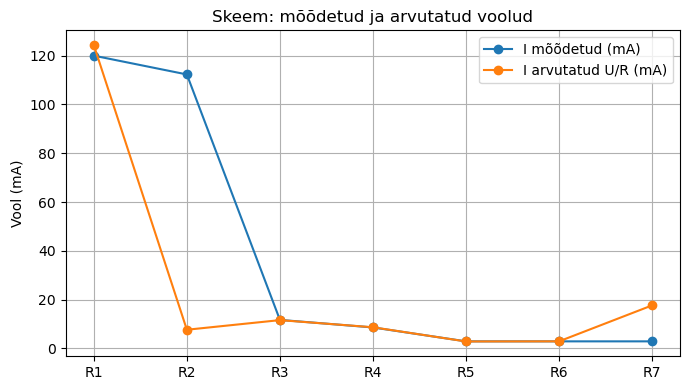

In [115]:
nimed = list(U_meas.keys())
x = np.arange(len(nimed))

Im_vals = np.array([I_meas[n][0] for n in nimed]) * 1000
Ic_vals = np.array([I_calc[n] for n in nimed]) * 1000

plt.figure(figsize=(7,4))
plt.plot(x, Im_vals, marker="o", label="I mõõdetud (mA)")
plt.plot(x, Ic_vals, marker="o", label="I arvutatud U/R (mA)")
plt.xticks(x, nimed)
plt.ylabel("Vool (mA)")
plt.title("Skeem: mõõdetud ja arvutatud voolud")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [116]:

max_abs_vahe_mA = np.max(np.abs((Ic_vals - Im_vals)))
print(f"Suurim absoluutne erinevus (mA): {max_abs_vahe_mA:.1f}")

Suurim absoluutne erinevus (mA): 104.6


Joonisel võrreldakse skeemi haruvoolusid. Sinisega on näidatud mõõdetud voolud ning oranžiga arvutatud voolud kus U on mõõdetud pingelang vastava takisti/haru üle ja R on takisti nimiväärtus. On väha selgelt näha kahte kohta, takistitel R2 ja R7, kus mõõdetud ja arvutatud pinged ei lähe kokku. Võibolla mõsime R2 juures midagi valesti, ei usu, et selline tulemus saaks olla tingitud mõõtjast ise.